In [60]:
import pandas as pd
import numpy as np
import os
import umap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import sys
from PIL import Image

In [61]:
quantified_directory = '/home/mass_spec_img/mass_spec_img/data/quantified'
df = pd.DataFrame()
y_max = 0
slide_names = ['SQ1631', 'SQ1632', 'SQ1633', 'SQ1634', 'SQ1635', 'SQ1636']
tissue_names = ['S1', 'S2', 'S3', 'S4']
for s in slide_names:
    slide_df = pd.DataFrame()
    for t in tissue_names:
        st = s+t+"_quantified.tsv"
        sub_df = pd.read_csv(os.path.join(quantified_directory, st), sep="\t")
        scaler = MinMaxScaler()
        for column in sub_df.columns[2:]:
            sub_df[column] = scaler.fit_transform(sub_df[[column]])
        slide_df = pd.concat([slide_df, sub_df], axis=0)
    slide_df['Y'] += y_max
    y_max = slide_df['Y'].max()
    df = pd.concat([df, slide_df], axis=0)
#df.to_csv("/home/mass_spec_img/mass_spec_img/data/quantified/SQ1631_1636_PCA.tsv", sep="\t", index=False)




In [62]:
df.head()

X    Y  mz772.526_mob1.43  mz826.575_mob1.48  mz713.451_mob1.36  \
0  1331  589                0.0                0.0                0.0   
1  1332  589                0.0                0.0                0.0   
2  1333  589                0.0                0.0                0.0   
3  1334  589                0.0                0.0                0.0   
4  1335  589                0.0                0.0                0.0   

   mz534.292_mob1.15  mz820.519_mob1.45  mz770.505_mob1.42  mz824.55_mob1.47  \
0                0.0           0.209424                0.0          0.271084   
1                0.0           0.078534                0.0          0.126506   
2                0.0           0.298429                0.0          0.319277   
3                0.0           0.109948                0.0          0.331325   
4                0.0           0.209424                0.0          0.301205   

   mz773.524_mob1.44  ...  mz823.544_mob1.46  mz791.921_mob1.18  \
0                0.0  ...                0.0                0.0   
1                0.0  ...                0.0                0.0   
2                0.0  ...                0.0                0.0   
3                0.0  ...                0.0                0.0   
4                0.0  ...                0.0                0.0   

   mz801.559_mob1.46  mz784.527_mob1.44  mz807.543_mob1.46  mz968.928_mob1.32  \
0                0.0           0.548128            0.52500                0.0   
1                0.0           0.534759            0.50000                0.0   
2                0.0           0.526738            0.43750                0.0   
3                0.0           0.558824            0.65000                0.0   
4                0.0           0.486631            0.65625                0.0   

   mz974.544_mob1.54  mz745.932_mob1.15  mz926.884_mob1.29  mz553.946_mob1.0  
0                0.0                0.0                0.0               0.0  
1                0.0                0.0                0.0               0.0  
2                0.0                0.0                0.0               0.0  
3                0.0                0.0                0.0               0.0  
4                0.0                0.0                0.0               0.0  

[5 rows x 54 columns]

In [63]:

data = df.iloc[:, 2:]
pca_scaler = PCA(n_components=3)
data = pca_scaler.fit_transform(data)
# get the coordinates of the pixels for the output image
xmin, xmax = df['X'].min(), df['X'].max()
ymin, ymax = df['Y'].min(), df['Y'].max()
df['X'] -= xmin
df['Y'] -= ymin

width = xmax - xmin + 1
height = ymax - ymin + 1

In [64]:
feature_weights = pd.DataFrame(
    pca_scaler.components_.T,  # Transpose to get features as rows, PCs as columns
    columns=[f'PC{i+1}' for i in range(pca_scaler.n_components_)],
    index=df.columns[2:]
)

# Get the transformed data points
# This shows each original data point in the new PC space
transformed_df = pd.DataFrame(
    data,
    columns=[f'PC{i+1}' for i in range(pca_scaler.n_components_)]
)

# If you want to see how much each PC explains the variance
explained_variance = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(pca_scaler.n_components_)],
    'Explained Variance Ratio': pca_scaler.explained_variance_ratio_,
    'Cumulative Variance Ratio': np.cumsum(pca_scaler.explained_variance_ratio_)
})


In [65]:
# Display the results
print("Feature loadings for each principal component:")
print(feature_weights)
print("\nTransformed data points:")
print(transformed_df.head())
print("\nExplained variance:")
print(explained_variance)

Feature loadings for each principal component:
                        PC1       PC2       PC3
mz772.526_mob1.43  0.098169  0.203048 -0.126762
mz826.575_mob1.48  0.150787 -0.012516  0.067009
mz713.451_mob1.36  0.052018  0.142714 -0.019892
mz534.292_mob1.15  0.051985  0.081547 -0.012818
mz820.519_mob1.45  0.105826 -0.005811  0.126740
mz770.505_mob1.42  0.148450  0.268362 -0.264222
mz824.55_mob1.47   0.164332  0.011334  0.142561
mz773.524_mob1.44  0.088996  0.168845 -0.061340
mz799.543_mob1.46  0.258769  0.067356 -0.146808
mz796.525_mob1.43  0.241835  0.011226 -0.118707
mz848.558_mob1.48  0.175115 -0.071742  0.138576
mz761.453_mob1.39  0.090960  0.015891  0.075106
mz744.495_mob1.4   0.088894  0.233315 -0.167942
mz739.466_mob1.37  0.157546  0.091580  0.015583
mz741.529_mob1.42  0.108027 -0.117289  0.068347
mz827.576_mob1.48  0.108284 -0.009015  0.081533
mz741.488_mob1.42  0.030527 -0.003447  0.145350
mz851.642_mob1.53  0.071010  0.034655  0.084717
mz821.531_mob1.45  0.154818 -0.038905  0.

Loadings:
[[ 0.06367001  0.08420886 -0.04711125]
 [ 0.0977963  -0.0051908   0.02490387]
 [ 0.0337373   0.05918672 -0.00739283]
 [ 0.03371611  0.03381958 -0.00476389]
 [ 0.06863612 -0.00241001  0.04710326]
 [ 0.09628084  0.1112962  -0.09819876]
 [ 0.10658164  0.00470028  0.05298309]
 [ 0.05772067  0.07002387 -0.02279703]
 [ 0.16783064  0.02793404 -0.05456151]
 [ 0.15684797  0.00465563 -0.04411782]
 [ 0.11357529 -0.02975302  0.05150219]
 [ 0.05899422  0.00659039  0.02791326]
 [ 0.05765408  0.09676118 -0.06241577]
 [ 0.10218025  0.03798062  0.00579142]
 [ 0.07006346 -0.04864267  0.02540122]
 [ 0.07023024 -0.00373865  0.03030191]
 [ 0.01979879 -0.00142946  0.05401961]
 [ 0.04605544  0.01437225  0.03148535]
 [ 0.10041074 -0.01613466  0.01721856]
 [ 0.07198592  0.05224324  0.02178179]
 [ 0.15873518  0.00020891 -0.0443644 ]
 [ 0.13536807 -0.01266775  0.01825096]
 [ 0.08557563 -0.00093744  0.0328702 ]
 [ 0.08899252 -0.01621199  0.08353384]
 [ 0.07747361 -0.00169175  0.09533033]
 [ 0.08561688  

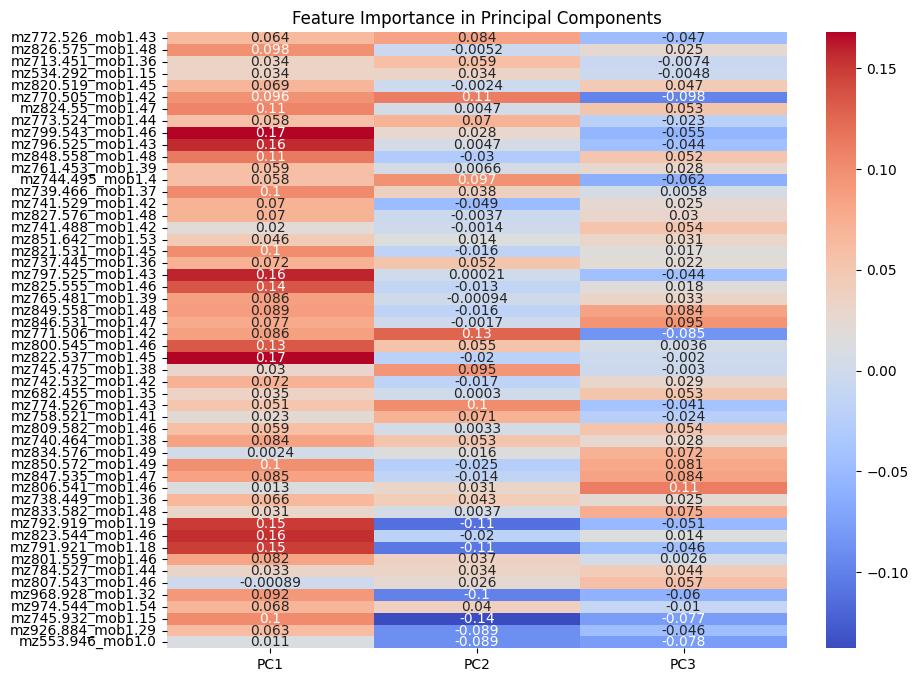

In [66]:
import seaborn as sns
loadings = pca_scaler.components_.T * np.sqrt(pca_scaler.explained_variance_)
print("Loadings:")
print(loadings)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', xticklabels=['PC1', 'PC2', 'PC3'], yticklabels=df.columns[2:])
plt.title('Feature Importance in Principal Components')
plt.show()

In [46]:
for i in range(data.shape[1]):
    v = data[:, i]
    data[:, i] = (v - v.min()) / (v.max() - v.min())
img = Image.new('RGB', (width, height), color='black')


red_color = np.array((255, 0, 0))
cred_color = np.array((0, 255, 255))
green_color = np.array((0, 255, 0))
cgreen_color = np.array((255, 0, 255))
blue_color = np.array((0, 0, 255))
cblue_color = np.array((255, 255, 0))

xp = 1

for r in range(data.shape[0]):
    the_color = np.zeros(3)
    i = 0
    rval = (data[r,i] - 0.5) / 0.5
    if rval > 0:
        the_color += rval * red_color
    else:
        the_color += (-1 * rval) * cred_color
    i = 1
    gval = (data[r,i] - 0.5) / 0.5
    if gval > 0:
        the_color += gval * green_color
    else:
        the_color += (-1 * gval) * cgreen_color
    i = 2
    bval = (data[r,i] - 0.5) / 0.5
    if bval > 0:
        the_color += bval * blue_color
    else:
        the_color += (-1 * bval) * cblue_color

    the_color /= (255 * 3)
    the_color *= 255
    for i in range(xp):
        for j in range(xp):
            img.putpixel((df.iloc[r,0]*xp + i,df.iloc[r,1]*xp + j), tuple(np.int32(the_color)))

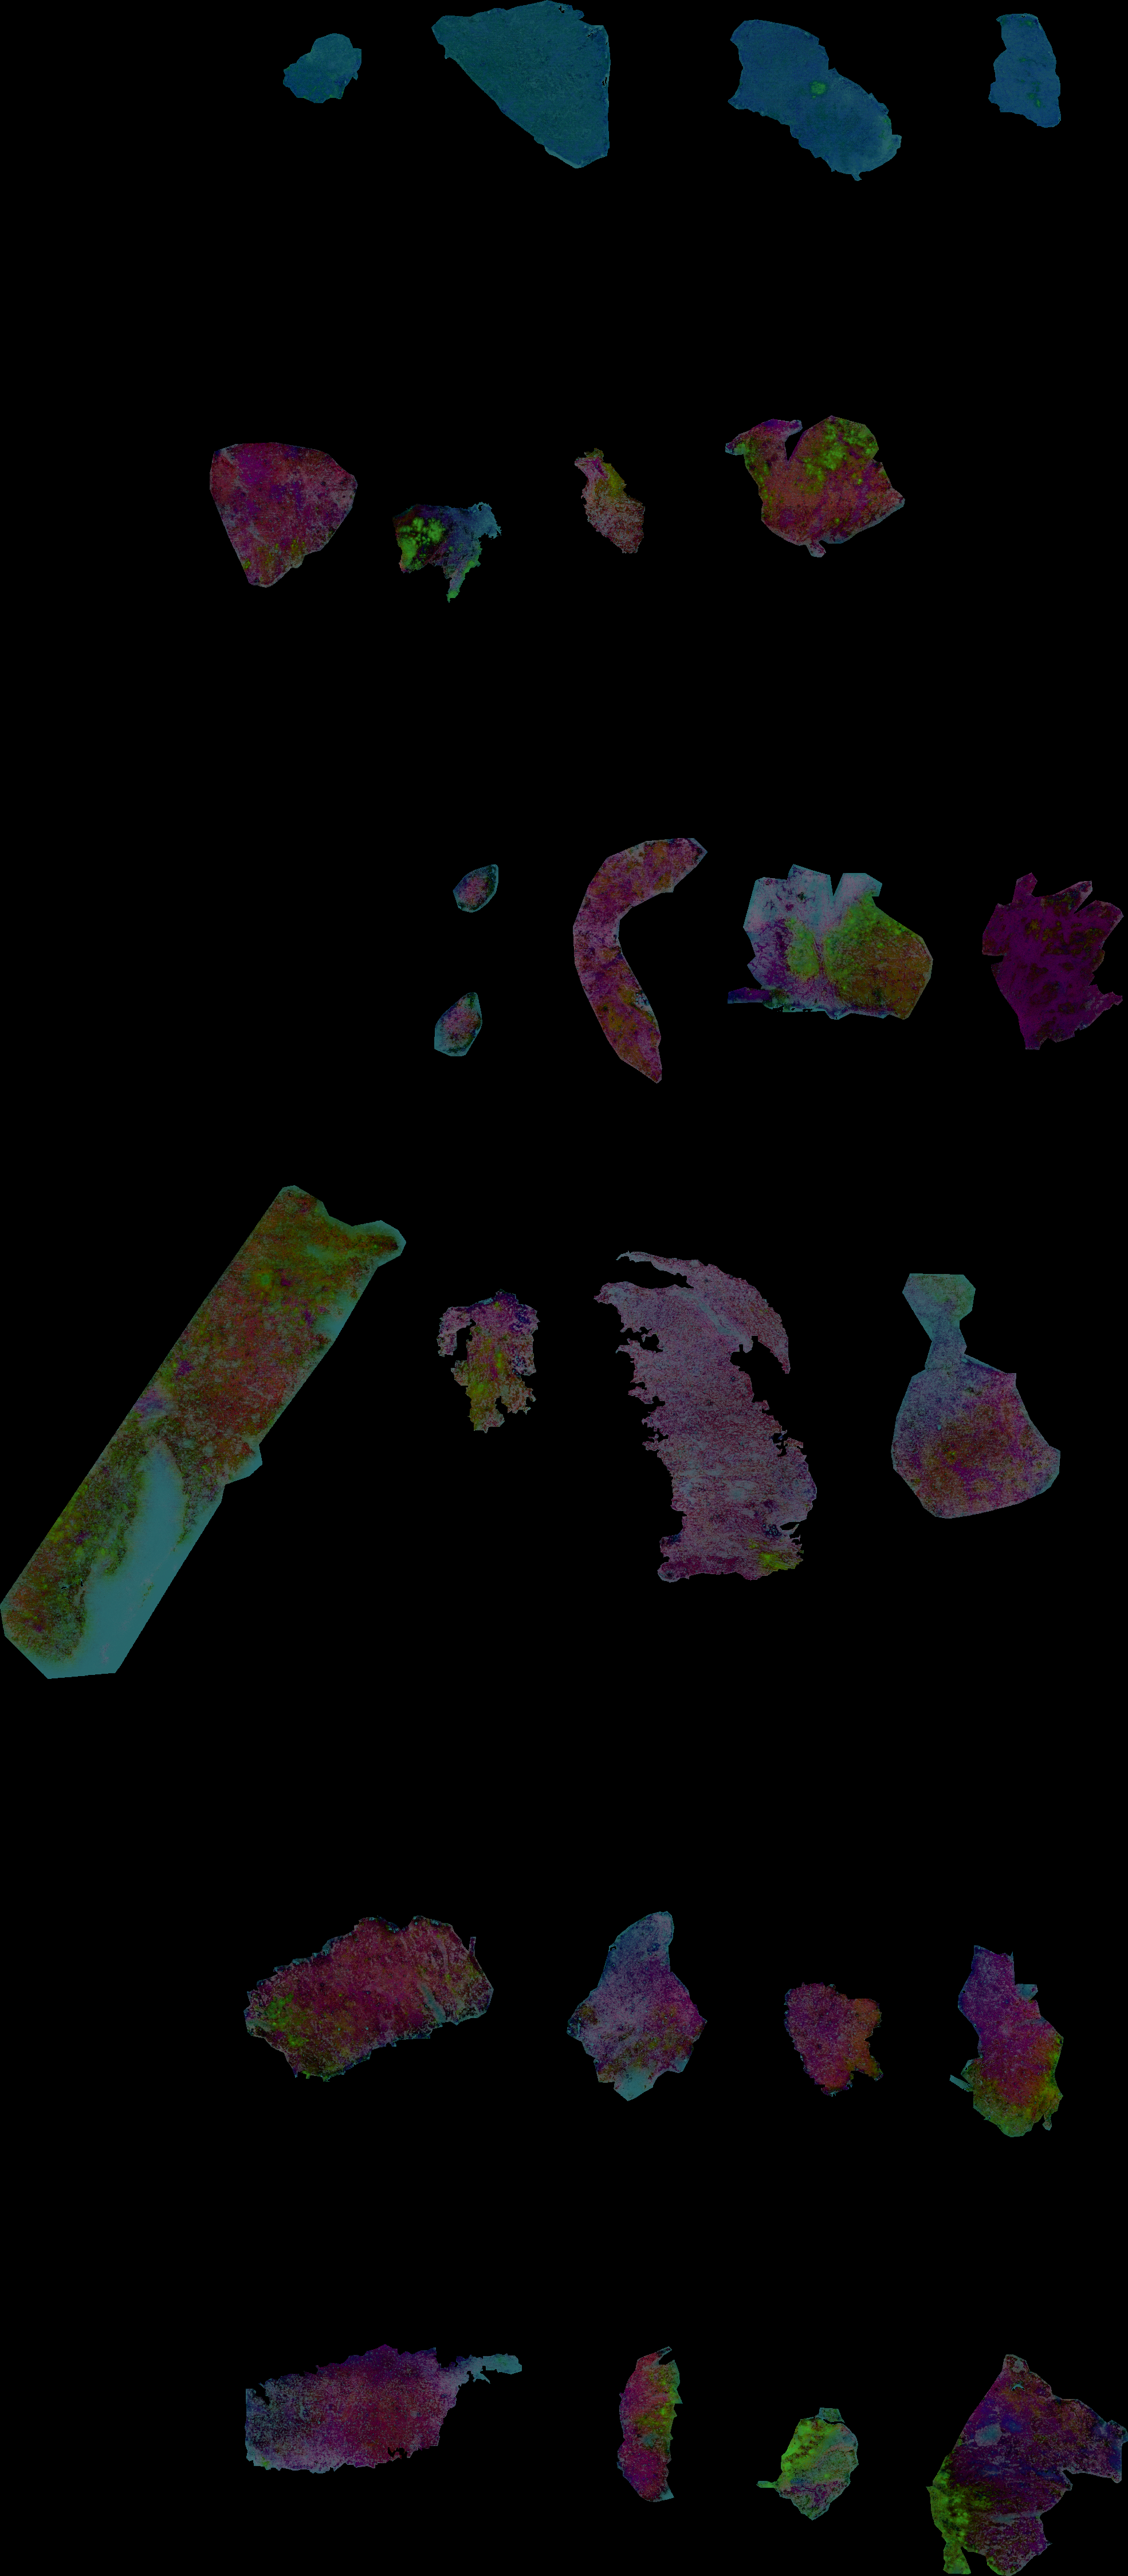

In [47]:
display(img)